# Análise de dados elétricos de eficiência energética em edificações

## Explorando os dados elétricos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados_eletricos = pd.read_csv("../data/raw_data/data/meters/raw/electricity.csv")

In [3]:
dados_eletricos.head()

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


Os edifícios são classificados por tipo. Talvez seja importante escolher um tipo específico para poder comparar. Posso escolher um tipo mais comum e que tenha a maior quantidade de dados.

In [4]:
dados_eletricos_office = []
for col in dados_eletricos.columns:
    if "office" in col:
        dados_eletricos_office.append(col)
dados_eletricos_office = dados_eletricos.loc[:,dados_eletricos_office]
dados_eletricos_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 296 entries, Panther_office_Hannah to Cockatoo_office_Ada
dtypes: float64(296)
memory usage: 39.6 MB


In [5]:
dados_eletricos_education = []
for col in dados_eletricos.columns:
    if "education" in col:
        dados_eletricos_education.append(col)
dados_eletricos_education = dados_eletricos.loc[:,dados_eletricos_education]
dados_eletricos_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 604 entries, Panther_education_Teofila to Cockatoo_education_Tyler
dtypes: float64(604)
memory usage: 80.8 MB


Comparando as duas listas, são 296 edifícios de escritório e 604 edifício de educação.

## Importando os metadados de localização

## Explorando os metadados

In [6]:
metadados = pd.read_csv("../data/raw_data/data/metadata/metadata.csv")
metadados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1615 non-null   object 
 5   sub_primaryspaceusage  1615 non-null   object 
 6   sqm                    1636 non-null   float64
 7   sqft                   1636 non-null   float64
 8   lat                    1399 non-null   float64
 9   lng                    1399 non-null   float64
 10  timezone               1636 non-null   object 
 11  electricity            1578 non-null   object 
 12  hotwater               185 non-null    object 
 13  chilledwater           555 non-null    object 
 14  steam                  370 non-null    object 
 15  wate

Desses itens vou precisar de:
- `sqm`: para saber a eficiência de uso de energia por metro quadrado;
- `lat`: para saber quais edifícios estão em uma localização de zonas mais frias (não-tropicais)? Tenho que pensar melhor esse critério;
- `heatingtype`: talvez seja importante;

É importante notar que dos 1636 edifícios, mais de 1500 possuem dados de energia. Portanto, justifica focar nessa medição.

<AxesSubplot:xlabel='building_id', ylabel='sqm'>

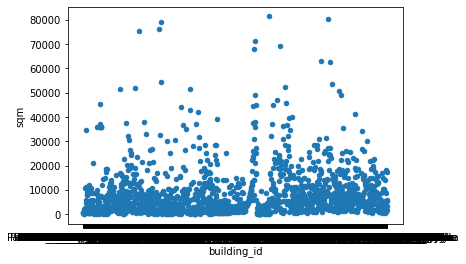

In [7]:
metadados.plot.scatter("building_id", "sqm")

Dá para perceber que existem muitos edifícios em localização parecidas pela linearidade das latitudes. Pensar critérios para escolher o clima baseado na latitude.

<AxesSubplot:xlabel='building_id', ylabel='lat'>

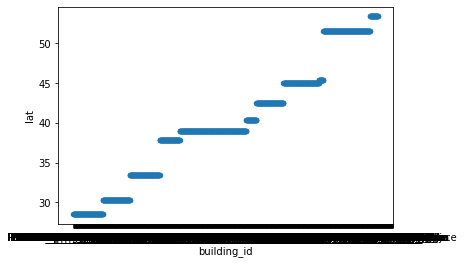

In [8]:
#metadados["lat"].plot()
metadados.sort_values("lat").plot.scatter("building_id", "lat")

A quantidade de dados sobre o `heatingtype` é muito pequena em relação à lista total. Eu tenho mais de 1500 dados sobre uso de energia, mas só 215 edifícios declaram o tipo de uso para aquecimento. Devo ignorar isso? 

In [9]:
metadados["heatingtype"].isnull().value_counts()
#metadados["heatingtype"].value_counts().head().plot.bar()

True     1421
False     215
Name: heatingtype, dtype: int64

## Explorando os dados climáticos

In [10]:
dados_climaticos = pd.read_csv("../data/raw_data/data/weather/weather.csv")
dados_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


Vou utilizar principalmente a temperatura do ar (Dessa forma eu ainda preciso da latitude?)

In [14]:
dados_climaticos_panther = dados_climaticos[dados_climaticos["site_id"] == "Panther"]
dados_climaticos_panther["airTemperature"].mean()

22.80509092982156

In [15]:
dados_climaticos["site_id"].unique()

array(['Panther', 'Robin', 'Fox', 'Rat', 'Bear', 'Lamb', 'Peacock',
       'Moose', 'Gator', 'Bull', 'Bobcat', 'Crow', 'Shrew', 'Swan',
       'Wolf', 'Hog', 'Eagle', 'Cockatoo', 'Mouse'], dtype=object)

In [23]:
list_of_sites = ['Panther', 'Robin', 'Fox', 'Rat', 'Bear', 'Lamb', 'Peacock',
       'Moose', 'Gator', 'Bull', 'Bobcat', 'Crow', 'Shrew', 'Swan',
       'Wolf', 'Hog', 'Eagle', 'Cockatoo', 'Mouse']
temperatura_media = []
for site in list_of_sites:
    lista = dados_climaticos[dados_climaticos["site_id"] == site]
    media = lista["airTemperature"].mean()
    temperatura_media.append([site, media])

dados_climaticos_media = pd.DataFrame(temperatura_media, columns=["site_id", "mediumAirTemperature"])
dados_climaticos_media


,site_id,mediumAirTemperature
0,Panther,22.805091
1,Robin,11.842307
2,Fox,25.075584
3,Rat,15.661433
4,Bear,15.102759
5,Lamb,11.000171
6,Peacock,15.346297
7,Moose,7.798055
8,Gator,22.805091
9,Bull,21.586860


Acima está a média da temperatura pelo sítio.